# Центральная предельная теорема своими руками

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины.

Для нескольких значений n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения.

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

Решение должно представлять собой IPython-ноутбук, содержащий:

код, генерирующий выборки и графики;
краткие описания каждого блока кода, объясняющие, что он делает;
необходимые графики (убедитесь, что на них подписаны оси);
выкладки с вычислениями параметров нормальных распределений, аппроксимирующих выборочные средние при различных n;
выводы по результатам выполнения задания.

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pareto
%matplotlib inline

Распределе́ние Паре́то в теории вероятностей — двухпараметрическое семейство абсолютно непрерывных распределений, являющихся степенными. Называется по имени Вилфредо Парето. Встречается при исследовании различных явлений, в частности, социальных, экономических, физических и других[1]. Вне области экономики иногда называется также распределением Брэдфорда.


Bилфредо Парето изначально использовал это распределение для описания распределения благосостояния, а также распределения дохода[2]. Его правило 20 к 80 (которое гласит: 20 % популяции владеет 80 % богатства) однако зависит от конкретной величины k, и утверждается, что фактически встречаются существенные количественные отклонения, например, данные самого Парето по Британии в Cours d'économie politique говорят, что там примерно 30 % населения владеет 70 % общего дохода.

https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9F%D0%B0%D1%80%D0%B5%D1%82%D0%BE

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pareto.html#scipy.stats.pareto

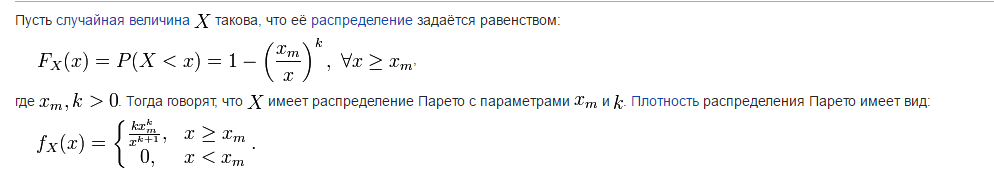

In [58]:
from IPython.display import Image
Image(filename='pareto_1.png')


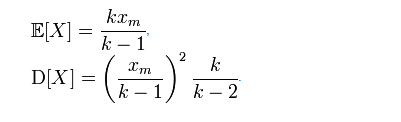

In [123]:
from IPython.display import Image
Image(filename='pareto_2.png')

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины.

In [128]:
# Выбор параметров для распределения
k = 10
x_m = 1

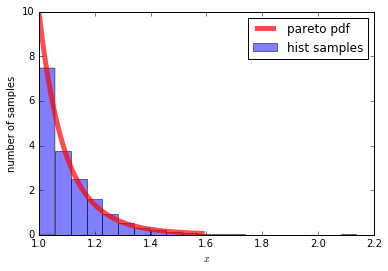

In [129]:
#Сгенерируйте из него выборку объёма 1000
sampleRange = paretoF(1000)
#Постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины.
plt.hist(sampleRange, normed=True, bins=20, alpha=0.5, label='hist samples')
plt.ylabel('number of samples')
plt.xlabel('$x$')
#теоретическая плотность распределения случайной величины
left = pareto.ppf(0.01, k)
right =  pareto.ppf(0.99, k)
x = np.linspace(left,  right, 100)
plt.plot(x, pareto.pdf(x, k), 'r-', lw=5, alpha=0.7, label='pareto pdf')
plt.legend(loc='best')

1.11111111111
0.12422599875
0.0154320987654


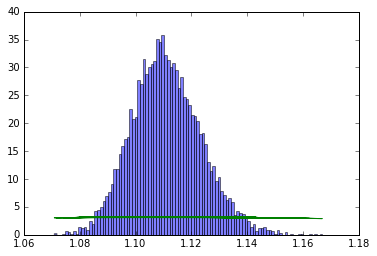

In [170]:
# values = np.array([pareto.rvs(k, size=10) for x in range(10)])
# print values
# plt.hist(values.mean(axis=1), normed=True)

m = []
for _ in xrange(20):
    m.append(np.mean(pareto.rvs(k, size=1000)))
# plt.hist(m, normed=True, alpha=0.5, label='hist samples')

mean = pareto.mean(k)
EX = mean
print mean
std = pareto.std(k)
print std
DX = std**2
print DX

n = 100
values = np.array([ pareto.rvs(k, size=n) for x in range(10000)])
# print 'values ', values
# print 'mean ', values.mean(axis = 1)
meanAr = values.mean(axis = 1)
plt.hist(meanAr, normed=True, alpha=0.5, bins=100, label='hist samples')

import scipy.stats as sts

mu = EX
sigma = DX/n

# зададим нормально распределенную случайную величину
norm_rv = sts.norm(loc=mu, scale=std)
x = np.linspace(1,1.22,100)
# print x
pdf = norm_rv.pdf(x)
# plt.plot(x, pdf)

# для построения используем библиотеку Pandas:
import pandas as pd
df = pd.DataFrame(meanAr)
# print df
norm_rv = sts.norm(loc=mu, scale=std)
x = np.linspace(1,1.22,100)
# print x
pdf = norm_rv.pdf(df)
plt.plot(df, pdf)


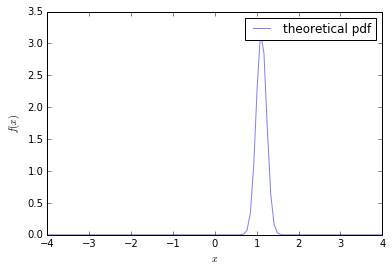

In [146]:
# на том же графике построим теоретическую функцию распределения:
x = np.linspace(-4,4,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')